<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 1. DNN Basis**
# Section 1. Linear Regression & Loss Function

딥러닝을 이해하기 위해서는 **선형 회귀(Linear Regression)**와 **로지스틱 회귀(Logsitic Regression)**를 이해할 필요가 있습니다. 이번 Section에서는 딥러닝을 본격적으로 시작하기 전에 선형 회귀와 머신러닝에서 쓰이는 **손실 함수(Loss Function)**와 **경사 하강법(Gradient Descent)**에 대한 개념에 대해 알아보겠습니다.

### _Objective_
1. **Linear Regression**: 머신러닝의 알고리즘 중 가장 기본이 되는 선형 회귀에 대해 알아봅니다.<br>
2. **Loss Function**: 선형 회귀를 최적화하기 위한 식인 Loss Function에 대해 알아봅니다.<br>
3. **Grid Search & Gradient Descent**: Loss Function의 최솟값을 찾는 방법에 대해 알아봅니다.<br>

In [1]:
%matplotlib inline
import numpy as np
# 데이터 조작 및 분석을 위한 pandas 라이브러리
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt

# \[ 1. 선형회귀 \]

회귀 모델은 학습데이터를 가지고 특성(feature)과 레이블(label)의 관계를 함수식으로 표현하는 것이 목적입니다. 회귀 모델 중 하나인 **선형 회귀**는 특징 정보 간의 관계를 **선형적**이라고 가정한 머신러닝 모델입니다. 선형 회귀는 다수의 독립 변수(X)를 바탕으로 종속 변수(Y)와의 상관 관계를 모델링합니다. 머신러닝에서는 X를 특성, Y를 label이라고 합니다.

## 예제 데이터 ) 빅데이터로 예측한 '옥자' 관객 수

* 이전까지 개봉했던 영화의 보고싶어요 수와 관객 수를 바탕으로, 옥자의 예상 관객 수 예측하기

아래의 데이터는 영화 추천 프로그램 `왓챠`의 '보고싶어요'수와 실제 관객수를 바탕으로 2017년 개봉한 영화 "옥자"의 '보고싶어요'수를 기준으로 "옥자"의 총 관객 수를 예측해보기 위한 데이터입니다. 데이터 조작 및 분석을 위해, Python언어로 작성된 소프트웨어 라이브러리인 **PANDAS**를 사용하도록 하겠습니다.

참고 : [빅데이터로 예측한 옥자 관객 수 727만 명](http://platum.kr/wp-content/uploads/2017/06/unnamed-12.png)
<img src="http://platum.kr/wp-content/uploads/2017/06/unnamed-12.png" width="500" height="500"/><br>

| 영화 제목 | 왓챠'보고싶어요' 수 | 총 관객 수(만명) | 
| ------  | -------        | -----    |
| 마션     | 8759           | 487      |
| 킹스맨   | 10132           | 612     |
| 캡틴아메리카 | 12078         | 866     |
| 인터스텔라 | 16430          | 1030    |
| 옥자     | 12008          | ?       |

In [2]:
movie_df = pd.DataFrame([
    [8759, 487],
    [10132,612],
    [12078,866],
    [16430,1030]],
    columns=["nums_want_to_see","nums_audience"])
movie_df.index = ["마션","킹스맨","캡틴아메리카","인터스텔라"]
movie_df

,nums_want_to_see,nums_audience
마션,8759,487
킹스맨,10132,612
캡틴아메리카,12078,866
인터스텔라,16430,1030


<br>

## 1. 데이터 확인하기

위의 예제 데이터를 시각화하여 독립 변수인 "보고싶어요 수"와 종속 변수인 "총 관객 수"의 관계를 살펴보겠습니다.


### (1) 데이터 산포도 그리기

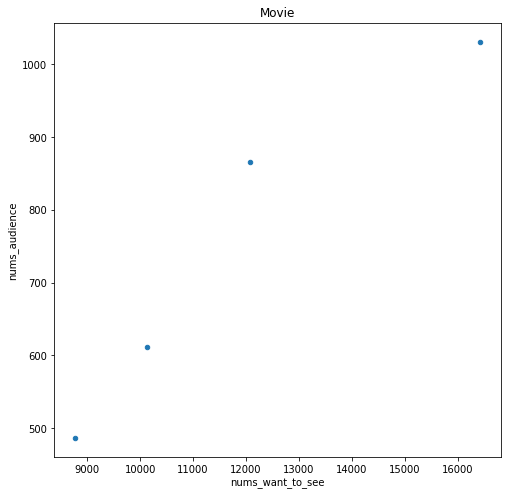

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

movie_df.plot(x='nums_want_to_see',y='nums_audience',
              kind='scatter', ax=ax, title="Movie")
plt.show()

위의 산포도를 통해, 대략적으로 "보고싶어요 수" 와 "총 관객수"가 어느정도 선형적인 관계를 이루고 있는 것을 확인할 수 있습니다.

### (2) 대략적인 추세선 그려보기

임의의 선형 함수의 추세 함수는 아래의 식입니다.<br>
우리는 "보고싶어요 수"($x$)를 통해 얼마나 많은 고객들이 볼지($\hat y$)를 예측하고자 합니다.

$$
\hat y = w_1 x + w_0
$$

우리는 아래와 같이 추세선을 예상할 수 있습니다.

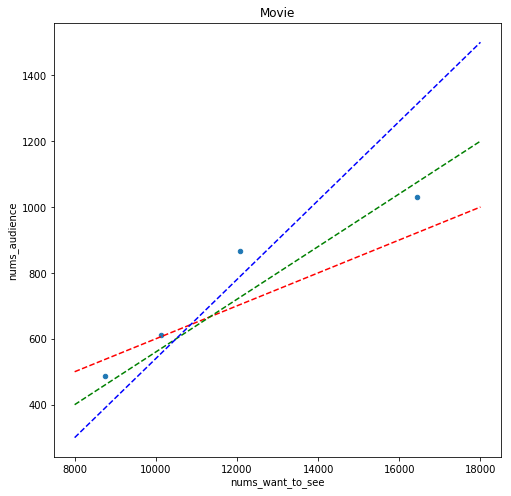

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

movie_df.plot(x='nums_want_to_see',y='nums_audience',
              kind='scatter', ax=ax, title="Movie")

plt.plot([8000,18000],[500,1000],'r--')
plt.plot([8000,18000],[400,1200],'g--')
plt.plot([8000,18000],[300,1500],'b--')

plt.show()

각 추세선 별로 예측 함수는 아래와 같습니다.

* 붉은 색 예측 함수 : $\hat y_{red} = 0.05x+100$
* 초록 색 예측 함수 : $\hat y_{green} = 0.08x-240$
* 파란 색 예측 함수 : $\hat y_{blue} = 0.12x-600$

옥자의 현재 보고싶어요 수는 12,008개인데, 각 예측 함수별로 유추한 옥자의 예상 총 관객수는 아래와 같습니다.

In [5]:
nums_by_red = 0.05 * 12008 + 100
print("붉은 색 예측 함수로 보았을 때 총 관객 수 : {}만명".format(nums_by_red))
nums_by_green = 0.08 * 12008 - 240
print("초록 색 예측 함수로 보았을 때 총 관객 수 : {}만명".format(nums_by_green))
nums_by_red = 0.12 * 12008 - 600
print("파란 색 예측 함수로 보았을 때 총 관객 수 : {}만명".format(nums_by_red))

붉은 색 예측 함수로 보았을 때 총 관객 수 : 700.4만명
초록 색 예측 함수로 보았을 때 총 관객 수 : 720.64만명
파란 색 예측 함수로 보았을 때 총 관객 수 : 840.96만명


이 중에서 어떤 예측이 더 정확한지를 말하기 위해서는 어떤 추세선이 더 올바른 추세선인지를 파악할 수 있는 기준이 필요합니다.<br>
이러한 기준을 제시하는 것이 바로 손실 함수, 즉 **Loss Function**입니다.

# \[ 2. 손실 함수 \]

## 1. 손실함수 정의

**손실함수(loss function)**는 모델의 가중치를 결정하는 함수로, 실제값과 가설함수간의 차이를 뜻합니다. 여러 개의 추세선(red,green,blue)중 어떤 추세선이 더 올바른 추세선인지를 파악하기 위해 추세선이 예측한 값이 실제값과 얼마나 차이가 있는지를 손실 함수를 통해 계산해보도록 하겠습니다.

| 추세선(색) | $W_1$ |  $W_0$ |
| ----- | ---- | ---- |
| Red   | 0.05 | 100  |
| Green  | 0.08 | -240 |
| Blue | 0.12 | -600 |

In [6]:
# 예측 함수 설정하기
predict_by_red = lambda x : 0.05*x + 100
predict_by_green = lambda x : 0.08*x - 240
predict_by_blue = lambda x : 0.12*x - 600

In [7]:
# 예측 함수 적용하기
movie_df['red 예측 결과'] = movie_df.nums_want_to_see.apply(predict_by_red)
movie_df['green 예측 결과'] = movie_df.nums_want_to_see.apply(predict_by_green)
movie_df['blue 예측 결과'] = movie_df.nums_want_to_see.apply(predict_by_blue)
movie_df

,nums_want_to_see,nums_audience,red 예측 결과,green 예측 결과,blue 예측 결과
마션,8759,487,537.95,460.72,451.08
킹스맨,10132,612,606.60,570.56,615.84
캡틴아메리카,12078,866,703.90,726.24,849.36
인터스텔라,16430,1030,921.50,1074.40,1371.60


예측한 값과 실제값 간의 차이가 작을수록 우리는 좋은 예측이라고 말할 수 있습니다.<br>
좋은 예측을 찾기위해 우리는 예측값과 실제값 간의 차이를 각 예측 함수 별로 구해보도록 하겠습니다.

In [8]:
movie_df['red error'] = movie_df.nums_audience - movie_df['red 예측 결과']
movie_df['green error'] = movie_df.nums_audience - movie_df['green 예측 결과']
movie_df['blue error'] = movie_df.nums_audience - movie_df['blue 예측 결과']
movie_df

,nums_want_to_see,nums_audience,red 예측 결과,green 예측 결과,blue 예측 결과,red error,green error,blue error
마션,8759,487,537.95,460.72,451.08,-50.95,26.28,35.92
킹스맨,10132,612,606.60,570.56,615.84,5.40,41.44,-3.84
캡틴아메리카,12078,866,703.90,726.24,849.36,162.10,139.76,16.64
인터스텔라,16430,1030,921.50,1074.40,1371.60,108.50,-44.40,-341.60


위와 같이 각 예측함수의 예측값과 실제값간의 차이를 **오차(error)**라고 부릅니다.<br>
우리는 모델의 성능을 평가하기 위해, 오차를 이용해 기준을 세워야 합니다.

### (1) 오차의 평균 적용

오차를 구하는 방법에는 다양한 방법들이 있습니다. 일단 각 영화들의 예측값과 실제값 간의 차이들의 평균을 구해 오차를 계산하는 가장 간단한 방법을 사용해보도록 하겠습니다.

$$
\mbox{오차의 평균} = \frac{1}{4}\sum_{movie={\mbox{4개 영화}}} (\hat y^{movie} - y^{movie})
$$

In [9]:
# 오차의 평균을 적용
movie_df[['red error','green error','blue error']].mean()

red error      56.2625
green error    40.7700
blue error    -73.2200
dtype: float64

단순히 오차의 평균을 적용하면 위의 결과와 같이, 파란색 선이 가장 오차가 작다고 나타나게 됩니다. <br>
이는 오차의 부등호가 +,-가 동시에 존재해, 상쇄되기 때문입니다.

### (2) 오차 제곱평균 적용

위의 문제를 해결하기 위해, 각 영화들의 예측값과 실제값 간의 차이들에 제곱을 한 뒤에 평균을 구해 오차를 계산해보도록 하겠습니다.

$$
\mbox{오차의 제곱평균} = \frac{1}{4}\sum_{movie={\mbox{4개 영화}}} (\hat y^{movie} - y^{movie})^{2}
$$

In [10]:
# 오차의 제곱 평균을 적용
(movie_df[['red error','green error','blue error']] ** 2).mean()

red error      10168.430625
green error     5978.032400
blue error     29568.110400
dtype: float64

오차의 제곱평균을 적용한 경우 초록색 선이 가장 오차가 작다고 나타나게 됩니다. <br>
직관적으로 바라보았을 때에도 초록색선이 가장 오차가 적게 보입니다. <br>
MSE(Mean-Squared-Error)라 불리는 위의 수식은 이후에도 자주 쓰이는 손실 함수 중 하나입니다.

## 2. Grid Search로 최적의 가중치 찾기

우리가 지금까지 살펴봤던 선형 함수의 추세선은 다음과 같습니다.

$$
\hat y = w_1 x + w_0
$$

여기서 추세선을 결정하는 $w_1$과 $w_0$를 우리는 **가중치(weights)**라고 부릅니다. 예측하고자 하는 값을 최대한 정확하게 찾기 위해 손실함수를 가장 작게 하는 올바른 추세선을 찾는 것이 우리의 목표입니다. 올바른 추세선을 위한 최적의 weights는 어떻게 구할 수 있을까요? 최적의 weigths를 구하는 가장 간단한 방법은 모든 조합의 weights를 넣어보는 것입니다.

### (0) 수식으로 해석하기

우리가 목표로 하는 것은 
$$
Loss =\frac{1}{2m}\sum^{m}_{i=1}(\hat y^{(i)}-y^{(i)})^2
$$
위의 loss function을 최소화하는 Weight를 찾는 것입니다.<br>

### (1) 가중치 조합 만들기

가능한 가중치의 조합을 numpy를 사용해 만들어보겠습니다.

In [12]:
W0s = np.linspace(-1000,1000,100)
W1s = np.linspace(-1,1,100)

points = np.stack(np.meshgrid(W0s,W1s),axis=-1) # 가중치 조합 만들기
points = points.reshape(-1,2)
print("가중치 조합(w0, w1)의 갯수 : ", points.shape[0])

가중치 조합(w0, w1)의 갯수 :  10000


### (2) 손실함수값 계산하기

$$
Loss =\frac{1}{2m}\sum^{m}_{i=1}(\hat y^{(i)}-y^{(i)})^2
$$

In [11]:
def calculate_MSE(W0, W1):
    X = movie_df.nums_want_to_see # 독립 변수, 보고싶어요 수
    y_true = movie_df.nums_audience # 실제값

    y_pred = W1*X+W0 # 가중치 조합을 통한 예측값
    return # fix me! # MSE

In [12]:
losses = []
for W0, W1 in points:
    loss = calculate_MSE(W0, W1)
    losses.append(loss)
losses = np.array(losses)

### (3) 가중치 별 손실값 확인하기

In [13]:
points_with_loss = np.concatenate([points,
                                   losses.reshape(-1,1)],
                                  axis=1)

loss_df = pd.DataFrame(points_with_loss,columns=['W0','W1','Loss'])
loss_df.sample(10)

,W0,W1,Loss
5040,-191.919192,0.010101,7.079571e+05
9877,555.555556,0.979798,1.372893e+08
2860,212.121212,-0.434343,3.444094e+07
6197,959.595960,0.232323,9.007719e+06
7540,-191.919192,0.515152,2.832655e+07
1763,272.727273,-0.656566,7.259756e+07
2811,-777.777778,-0.434343,4.667300e+07
3620,-595.959596,-0.272727,2.193423e+07
4352,50.505051,-0.131313,5.426195e+06
2609,-818.181818,-0.474747,5.422755e+07


### (4) 최적의 조합 찾기

In [14]:
loss_df.sort_values('Loss').iloc[0] # Loss가 가장 작은 weight

W0       -90.909091
W1         0.070707
Loss    3538.206305
Name: 5345, dtype: float64

이것으로 우리는 Loss가 가장 작은 가중치 조합이 $(W_0,W_1)=(-90.9,0.07)$임을 찾아냈습니다.

### (5) 가중치 시각화

모든 가중치에 대한 Loss 값을 시각화해 보겠습니다.

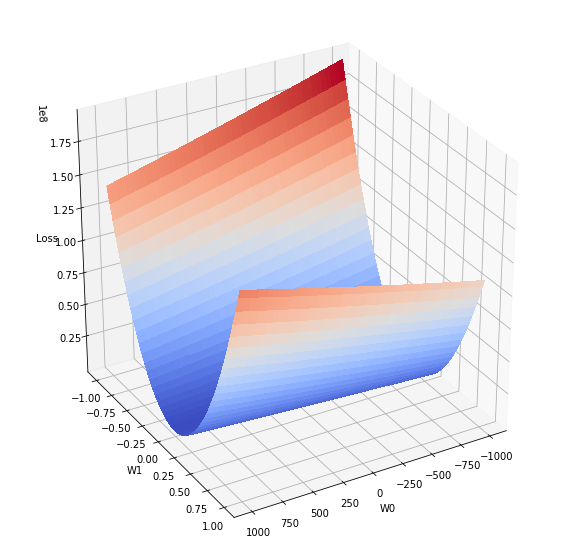

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

surf_value = loss_df.values.reshape(100,100,3)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X=surf_value[:,:,0],
                       Y=surf_value[:,:,1],
                       Z=surf_value[:,:,2],
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
ax.view_init(azim=60)
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('Loss')
plt.show()

우리는 위의 시각화 그래프를 통해, 손실함수가 볼록한 형태(Convex)임을 확인할 수 있습니다.

## 3. Grid Search의 문제점

### (1) Grid Search의 문제점

Grid Search를 사용해 최적의 가중치를 계산하기 위해 우리는 총 $W_0$의 케이스 수 100개, $W_1$의 케이스 수 100개로 <br>
총 $(W_0,W_1)$의 조합수 10000개를 직접 대입하여 찾았습니다. <br>
이와 같은 방식(Grid Search)으로 가중치 조합을 찾게 되면 아래와 같은 문제가 발생합니다.

1. 각 가중치 당 케이스 수를 늘리면 연산이 크게 늘어난다.
2. 가중치 종류의 수가 늘어나면 연산이 크게 늘어난다.

$\mbox{손실함수 계산 횟수} = \mbox{가중치 종류의 갯수}^{\mbox{가중치 당 케이스 수}}$

위 수식과 같이 폭발적으로 처리해야 하는 계산이 늘어납니다. <br>
위에서 다뤘던 예제와 같이 간단한 함수 관계에서는 가능하지만,<br>
훨씬 가중치의갯수가 많고, 데이터 수가 많으면 계산량이 지나치게 많아지게 됩니다.

### (2) 손실함수가 줄어드는 방향, `Negative Gradient`

* 손실함수 위의 한 점$(W_0,W_1) = (-500,-0.75)$을 임의로 잡아보겠습니다.

In [16]:
w0 = -500
w1 = -0.75
mse = calculate_MSE(w0,w1)

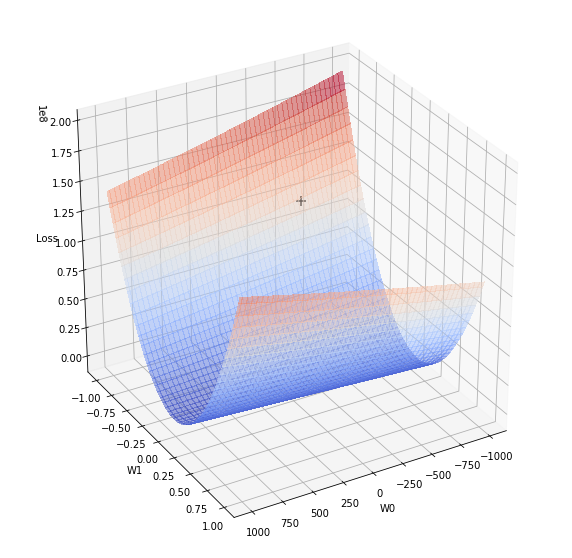

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter([w0], [w1], [mse], 
           s=100, c='black', marker='+', zorder=-1)

surf = ax.plot_surface(X=surf_value[:,:,0],
                       Y=surf_value[:,:,1],
                       Z=surf_value[:,:,2],
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False,
                       alpha=0.5,)
ax.view_init(azim=60)
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('Loss')
plt.show()

우리는 위의 그래프에서 직관적으로 '+' 점을 기준으로 어느 방향으로 값을 바꾸어야 하는지를 알 수 있습니다.<br>
손실함수가 줄어드는 방향인 **기울기의 반대 방향**으로 Weight$(W_0,W_1)$의 값을 갱신하면 됩니다.<br>
이와 같이 기울기의 반대 방향으로 값을 갱신하는 방식을 Gradient Descent 방식이라 합니다.

# \[ 3. Gradient Descent \]

경사하강법(Gradient Descent)은 손실함수의 기울기(경사)를 구하여, 기울기가 낮은 쪽(기울기의 반대방향)으로 계속 이동시켜 극값에 이를 때까지 반복시키는 알고리즘입니다.

$$
W_{new} = W_{old} - \alpha * \frac{\partial loss}{\partial W} 
$$

## 1. 손실함수 미분하기

$$
\mbox{예측함수 : } \hat y = w_1x + w_0\\
\mbox{손실함수 : } Loss(w_0,w_1) = \frac{1}{2m}\sum_{i=1}^{m}(\hat y - y)^2 = \frac{1}{2m}\sum_{i=1}^{m}(w_1x^{(i)}+w_0-y^{(i)})^2
$$

기본적인 미분 함수 식들을 다시 떠올려 보겠습니다.

<img src="https://i.imgur.com/ZIEgU9L.png" width="800" height="600"/><br>

위의 미분 공식을 통해, 각 Weight들을 미분해 보도록 하겠습니다.

$$
\frac{\partial Loss}{\partial w_0} = \frac{1}{m}\sum_{i=1}^{m}(w_1x^{(i)}+w_0 - y^{(i)})\\
\frac{\partial Loss}{\partial w_1} = \frac{1}{m}\sum_{i=1}^{m}(w_1x^{(i)}+w_0 - y^{(i)})x^{(i)}\\
$$

우리는 위의 미분식을 통해, 각 가중치 위치에서의 기울기를 알 수 있습니다.

In [18]:
# W0에 대한 미분식
def calculate_wo_derivative(w0,w1):
    x = movie_df.nums_want_to_see # 독립 변수, 보고싶어요 수
    y_true = movie_df.nums_audience # 실제값
    return # fix me!

# W1에 대한 미분식
def calculate_w1_derivative(w0,w1):
    x = movie_df.nums_want_to_see # 독립 변수, 보고싶어요 수
    y_true = movie_df.nums_audience # 실제값
    return # fix me!

In [19]:
w0 = -500
w1 = -0.75
mse = calculate_MSE(w0,w1)
dw0 = calculate_wo_derivative(w0,w1)
dw1 = calculate_w1_derivative(w0,w1)

dw0,dw1

(-10136.0625, -126987182.9375)

## 2. Gradient Descent 적용하기

$$
W_{new} = W_{old} - \alpha * \frac{\partial loss}{\partial W} 
$$

Gradient Descent 알고리즘에서 우리는 두 가지를 결정해야 합니다.

1. 한번에 얼마만큼 갱신할 것인가? (Learning Rate) : $\alpha$
2. 몇번이나 갱신할 것인가? (Epoch)

### (1) Learning Rate

우리는 Learning Rate($\alpha$)를 통해, 얼마나 갱신될지를 결정할 수 있습니다.<br>
가중치는 가중치 별로 갱신해야 하는 크기가 다릅니다.<br>

In [20]:
w0 = -500
w1 = -0.75
mse = calculate_MSE(w0,w1)
dw0 = calculate_wo_derivative(w0,w1)
dw1 = calculate_w1_derivative(w0,w1)

dw0,dw1

(-10136.0625, -126987182.9375)

여기서 dw1은 dw0에 비해 너무 큰 기울기값을 가지고 있습니다.<br> 
이를 조절하기 위해 학습률($\alpha$)을 0.001로 설정해보겠습니다.

In [22]:
alpha = 0.001

new_w0 = # fix me!
new_w1 = # fix me!

new_w0, new_w1

(-489.8639375, 126986.43293750001)

In [24]:
new_mse = calculate_MSE(new_w0,new_w1)

print("갱신하기 전 손실함수 값 : {:.3f}".format(mse))
print("갱신한 후  손실함수 값  : {:.3f}".format(new_mse))

갱신하기 전 손실함수 값 : 108385097.891
갱신한 후  손실함수 값  : 2399480551499843072.000


학습률을 0.001로 설정했더니 이번에는 오히려 손실함수의 값이 더 커졌습니다. <br>
우리의 목적은 손실함수의 값을 줄여나가는 것입니다. 이번엔 학습율을 $10^{-8}$로 설정해보겠습니다.

In [25]:
alpha = 2e-8

new_w0 = # fix me!
new_w1 = # fix me!

new_w0, new_w1

(-499.99979727875, 1.78974365875)

In [26]:
new_mse = calculate_MSE(new_w0,new_w1)

print("갱신하기 전 손실함수 값 : {:.3f}".format(mse))
print("갱신한 후  손실함수 값  : {:.3f}".format(new_mse))

갱신하기 전 손실함수 값 : 108385097.891
갱신한 후  손실함수 값  : 423160429.717


이번에는 손실함수가 적절하게 줄어든 것을 확인할 수 있습니다. <br>
반면에 학습률을 너무 작게 준다면, 아래와 같이 손실함수가 거의 줄지 않습니다. <br>
그래서 적절한 수준의 Learning Rate을 설정하는 것이 중요합니다.

In [27]:
alpha = 1e-10

new_w0 = # fix me!
new_w1 = # fix me!

new_w0, new_w1

(-499.99999898639373, -0.73730128170625)

In [28]:
new_mse = calculate_MSE(new_w0,new_w1)

print("갱신하기 전 손실함수 값 : {:.3f}".format(mse))
print("갱신한 후  손실함수 값  : {:.3f}".format(new_mse))

갱신하기 전 손실함수 값 : 108385097.891
갱신한 후  손실함수 값  : 105183944.072


### (2) Epoch

데이터 셋 전체를 계산하여 갱신한 횟수를 Epoch이라고 합니다.<br>
위 예제에서는 한번씩만 갱신을 했지만, 갱신 횟수는 직접 정해주어야 하는 값입니다. <br>
이번 예제에서는 100번 갱신해보도록 하겠습니다.

In [29]:
# 갱신된 weight와 mse 저장
w0_history = [w0]
w1_history = [w1]
mse_history = [mse]

alpha = 2e-10 # 학습률
epoch = 100 # 몇 번 학습할지 결정

for i in range(epoch):
    # 이전 가중치 가져오기
    old_w0 = w0_history[-1]
    old_w1 = w1_history[-1]
    
    # 미분값 갱신
    dw0 = calculate_wo_derivative(old_w0,old_w1)
    dw1 = calculate_w1_derivative(old_w0,old_w1)
    
    # 경사하강법을 통한 가중치 갱신
    new_w0 = old_w0 - alpha * dw0
    new_w1 = old_w1 - alpha * dw1
    new_mse = calculate_MSE(new_w0,new_w1)
    
    # 결과 저장
    w0_history.append(new_w0)
    w1_history.append(new_w1)
    mse_history.append(new_mse)

## 3. 결과 확인하기

---


In [30]:
hist_df = pd.DataFrame({
    "W0":w0_history,
    "W1":w1_history,
    "Loss":mse_history
})

손실함수를 시각화해보면 손실함수의 값이 꾸준히 떨어지는 것을 확인할 수 있습니다.

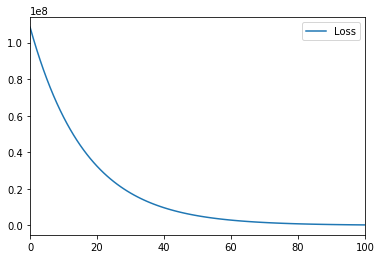

In [31]:
hist_df.plot(y='Loss')
plt.show()

In [32]:
hist_df.sort_values('Loss').iloc[0]

W0        -499.999935
W1           0.061810
Loss    270730.664559
Name: 100, dtype: float64

이를 Grid Search에서 활용했던 3D graph를 통해 확인해보겠습니다.

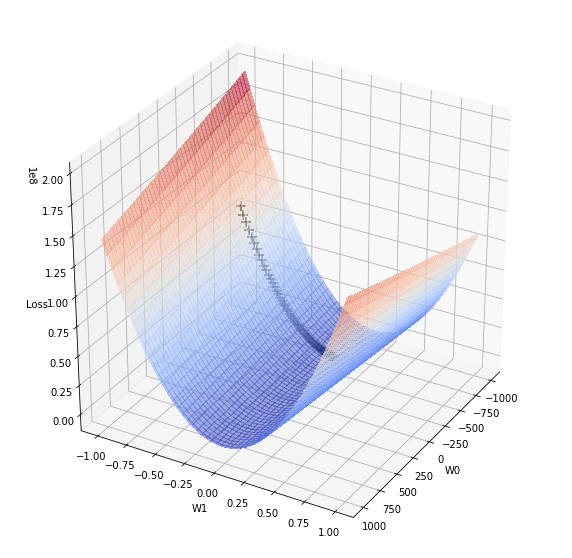

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(hist_df.W0, hist_df.W1, hist_df.Loss, 
           s=100, c='black', marker='+', zorder=-1)

surf = ax.plot_surface(X=surf_value[:,:,0],
                       Y=surf_value[:,:,1],
                       Z=surf_value[:,:,2],
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False,
                       alpha=0.5,)
ax.view_init(azim=30)
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('Loss')
plt.show()

Grid Search의 경우 우리는 모든 가중치의 조합을 다 탐색했어야 합니다.<br>
Gradient Descent의 경우, 우리는 훨씬 적은 횟수로도 원하는 최적의 값을 가져올 수 있습니다.

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/09/16


---